# Multi-armed bandits with UCB

The idea of this notebook is to implement a simple testbed to run a multiarmed bandits solution based on a sample average technique using Upper Confidence Bound to weight exploration.

$A_t = arg_amax\left[Q_t(a)+c\displaystyle\sqrt{\frac{ln t}{N_t(a)}}\right]$

where $c$ is a parameter that controls how much exploration must be done and $N_t(a)$ is the number of times a was selected

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
%matplotlib inline
np.random.seed(655321)

In [2]:
class TestBed:
    def __init__(self, n_actions, scale):
        self.n_actions = n_actions
        self.actions_q_values = np.random.normal(size=n_actions, scale=scale)
        self.initial_action_q_values = self.actions_q_values
        
    def reset_to_initial_q_values(self):
        np.random.seed(655321)
        self.actions_q_values = self.initial_action_q_values
        
    def update_action_values(self):
        self.actions_q_values = self.actions_q_values + np.random.normal(size=self.n_actions, scale=0.01)
        
    def get_reward(self, action):
        return(np.random.normal(self.actions_q_values[action]))
    
    def get_optimal_reward(self):
        return(np.max(self.actions_q_values))
    
    def get_optimal_action(self):
        return(np.argmax(self.actions_q_values))
        

In [3]:
env = TestBed(1000, scale=0.75)
print("Optimal action value achievable: {}\nOptimal action: {}"
      .format(env.get_optimal_reward(), env.get_optimal_action()))

Optimal action value achievable: 2.4936678914437582
Optimal action: 845


## $\epsilon$-greedy

In [4]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
epsilons = []
epsilon = 0.1
env.reset_to_initial_q_values()

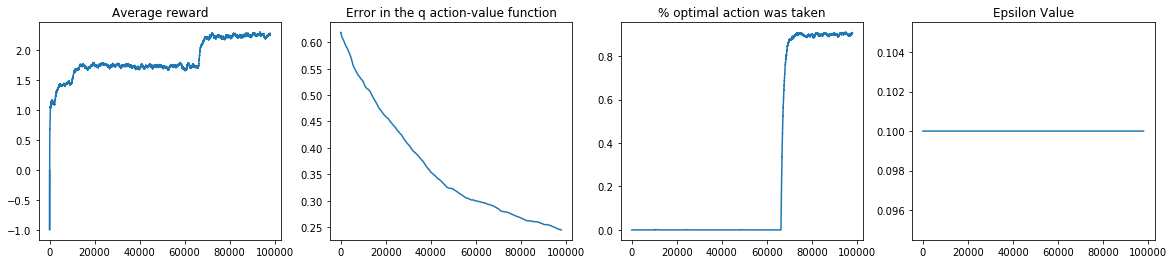

Cummulative reward achieved was 186695.55804278344 


In [5]:
for episode in range(100000):
    rand_epsilon = random.random()
    if rand_epsilon > epsilon:
        # Greedy
        action = np.argmax(q)
        reward = env.get_reward(action)
    else:
        # Random
        action = random.randint(0, env.n_actions-1)
        reward = env.get_reward(action)
    n[action] = n[action] + 1
    q[action] = q[action] + (1.0/n[action])*(reward-q[action])
    epsilons.append(epsilon)
    actions.append(action)
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions==env.get_optimal_action()).ewm(span=2000).mean())
        plt.title("% optimal action was taken")
        plt.subplot(144)
        plt.plot(pd.Series(epsilons))
        plt.title("Epsilon Value")

        plt.show()
print("Cummulative reward achieved was %s "% np.sum(rewards))

In [6]:
rewards_egreedy=rewards

## UCB

In [7]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
c = 2
t = 0
env.reset_to_initial_q_values()


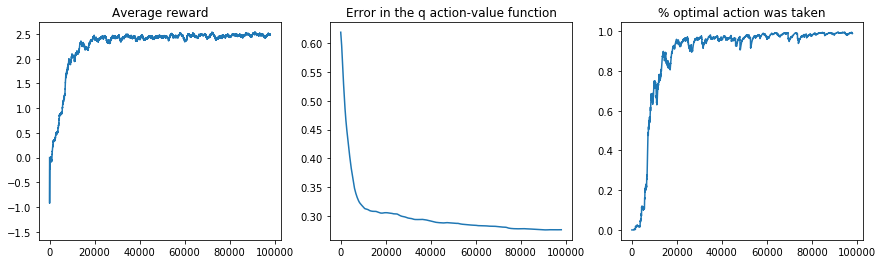

Cummulative reward achieved was 230154.0816087158 


In [8]:
for episode in range(100000):
    t += 1
    ucb = q + c * np.sqrt(np.log(t)/n)
    action = np.argmax(ucb)
    reward = env.get_reward(action)

    n[action] = n[action] + 1
    q[action] = q[action] + (1.0/n[action])*(reward-q[action])
    actions.append(action)
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions==env.get_optimal_action()).ewm(span=2000).mean())
        plt.title("% optimal action was taken")

        plt.show()
print("Cummulative reward achieved was %s "% np.sum(rewards))

In [9]:
rewards_ucb=rewards

##  Comparison

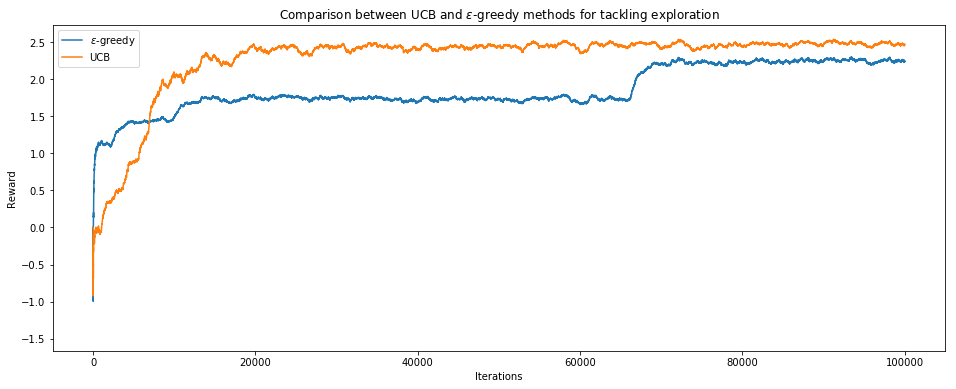

In [10]:
plt.figure(figsize=[16, 6])
plt.plot(pd.Series(rewards_egreedy).ewm(span=2000).mean())
plt.plot(pd.Series(rewards_ucb).ewm(span=2000).mean())
plt.title("Comparison between UCB and $\epsilon$-greedy methods for tackling exploration")
plt.ylabel("Reward")
plt.xlabel("Iterations")
plt.legend(["$\epsilon$-greedy", "UCB"])
plt.show()

